# Experimento de analise geral.

## TL;DR

nesse notebook estudamos como toda nossa exploração se combina e gera uma analise que abrange um escopo maior para 

## Objetivo

estudar como carda tipo de análise desde como cada tipo de pré processamento afeta os dados, até a analise das métricas que cada um dos aplicação dos métodos de clusterização

## Dados

CSV's





1) Entender de fato o que é o CTW 
2) Ver como ele correlaciona com o DTW e o CCA 
3) Aplicar o CTW e ver o resultado 
4) Fazer testes com diversas Features do XYZ-J e XYZ-Q 
5) Fazer o CTW com o CCA XYZ de dois ângulos (usamos o CTW como ferramenta de comparação de 2 angulos)
6) Fazer a comparação com 2 CTW 


Notebooks 


1-) 2 exercícios de 2 Voluntários


2-) cada usuário (7) concatenar os exercícios deles para ter 7 trial . E aplicar CTW neles

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bloco 1 - K-Means tradicional com distância Euclidiana
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
# Bloco 2 - K-Means com distância DTW (tslearn)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
# Bloco 3 - Hierarchical Clustering com DTW
from scipy.cluster.hierarchy import linkage, fcluster
from tslearn.metrics import cdist_dtw
# Bloco 4 - DBA-KMeans (K-Means com DTW Barycenter Averaging)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import seaborn as sns

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tslearn.metrics import dtw

/home/andre-marques/Desktop/Estudo/icBros/IC_Bros/venv/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Carregando dados de '../../../data/rafaelDBConcat.csv'...
Dados carregados com sucesso.
Gerando o gráfico...
Exibindo o gráfico. Feche a janela para terminar.


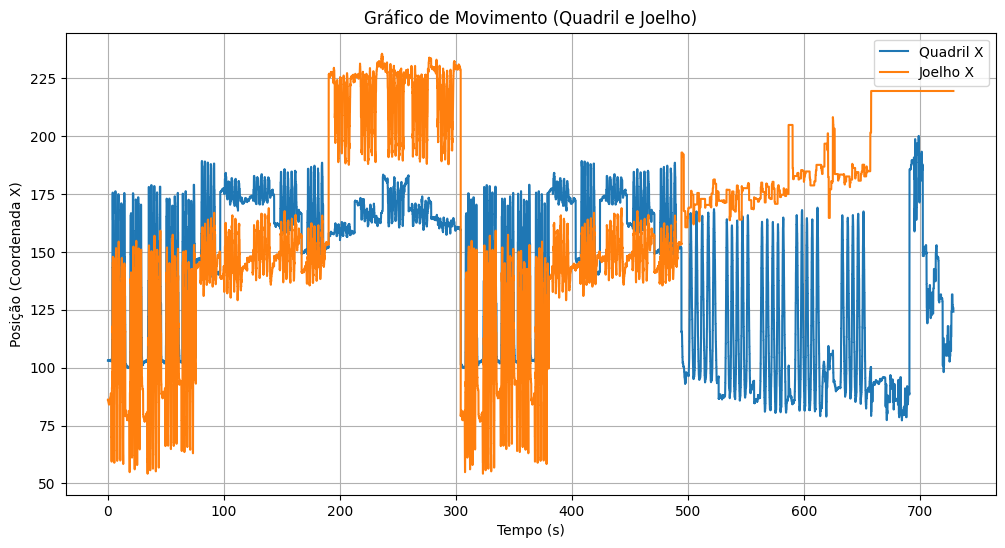

In [8]:
#juntando os dbs em um grande db
# -> rafaelDBConcat
# -> plot para a validação dos dados
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- INÍCIO DO CÓDIGO PARA VOCÊ USAR ---

# 1. Defina o nome do seu arquivo CSV
nome_do_arquivo = '../../../data/rafaelDBConcat.csv'

# 2. Verifica se o arquivo existe no mesmo diretório do script
if not os.path.exists(nome_do_arquivo):
    print(f"--- ERRO ---")
    print(f"O arquivo '{nome_do_arquivo}' não foi encontrado.")
    print("Por favor, certifique-se de que este script e o seu arquivo CSV estão na mesma pasta.")
else:
    try:
        # 3. Carrega os dados do arquivo
        print(f"Carregando dados de '{nome_do_arquivo}'...")
        df = pd.read_csv(nome_do_arquivo)
        print("Dados carregados com sucesso.")

        # 4. Cria a figura e o gráfico
        print("Gerando o gráfico...")
        plt.figure(figsize=(12, 6))  # Define um bom tamanho para a janela do gráfico

        # 5. Plota os dados que você quer ver
        # Exemplo: plotando apenas as coordenadas X do Quadril e do Joelho
        plt.plot(df['timestamp'], df['Quadrilx'], label='Quadril X')
        plt.plot(df['timestamp'], df['Joelhox'], label='Joelho X')

        # 6. Adiciona informações ao gráfico para ficar mais claro
        plt.title('Gráfico de Movimento (Quadril e Joelho)')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Posição (Coordenada X)')
        plt.legend()  # Mostra os nomes das linhas (labels)
        plt.grid(True)  # Adiciona uma grade de fundo

        # 7. Mostra o gráfico na tela
        print("Exibindo o gráfico. Feche a janela para terminar.")
        plt.show()

    except Exception as e:
        print(f"--- ERRO AO GERAR O GRÁFICO ---")
        print(f"Ocorreu um problema: {e}")
        print("Verifique se o seu arquivo CSV não está corrompido e se as colunas 'timestamp', 'Quadrilx' e 'Joelhox' existem.")

# --- FIM DO CÓDIGO ---

Procurando arquivos em: '../../../data/rafaelDBConcatFolder'
Encontrados 7 arquivos. Mostrando gráficos um por um.

Preparando gráfico para o Voluntário nº 1...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


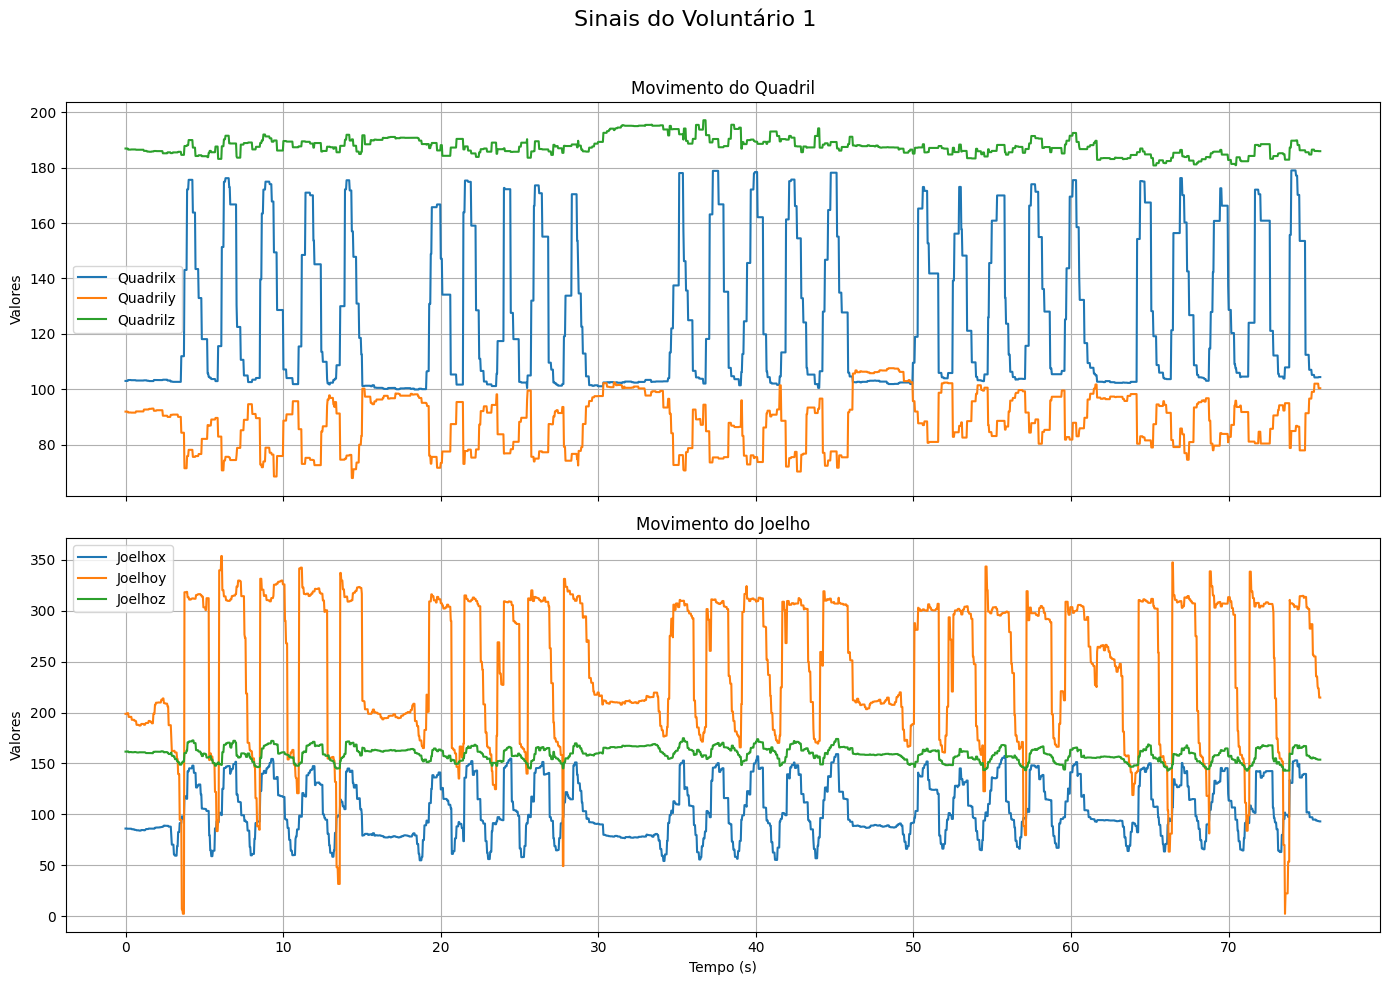


Preparando gráfico para o Voluntário nº 2...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


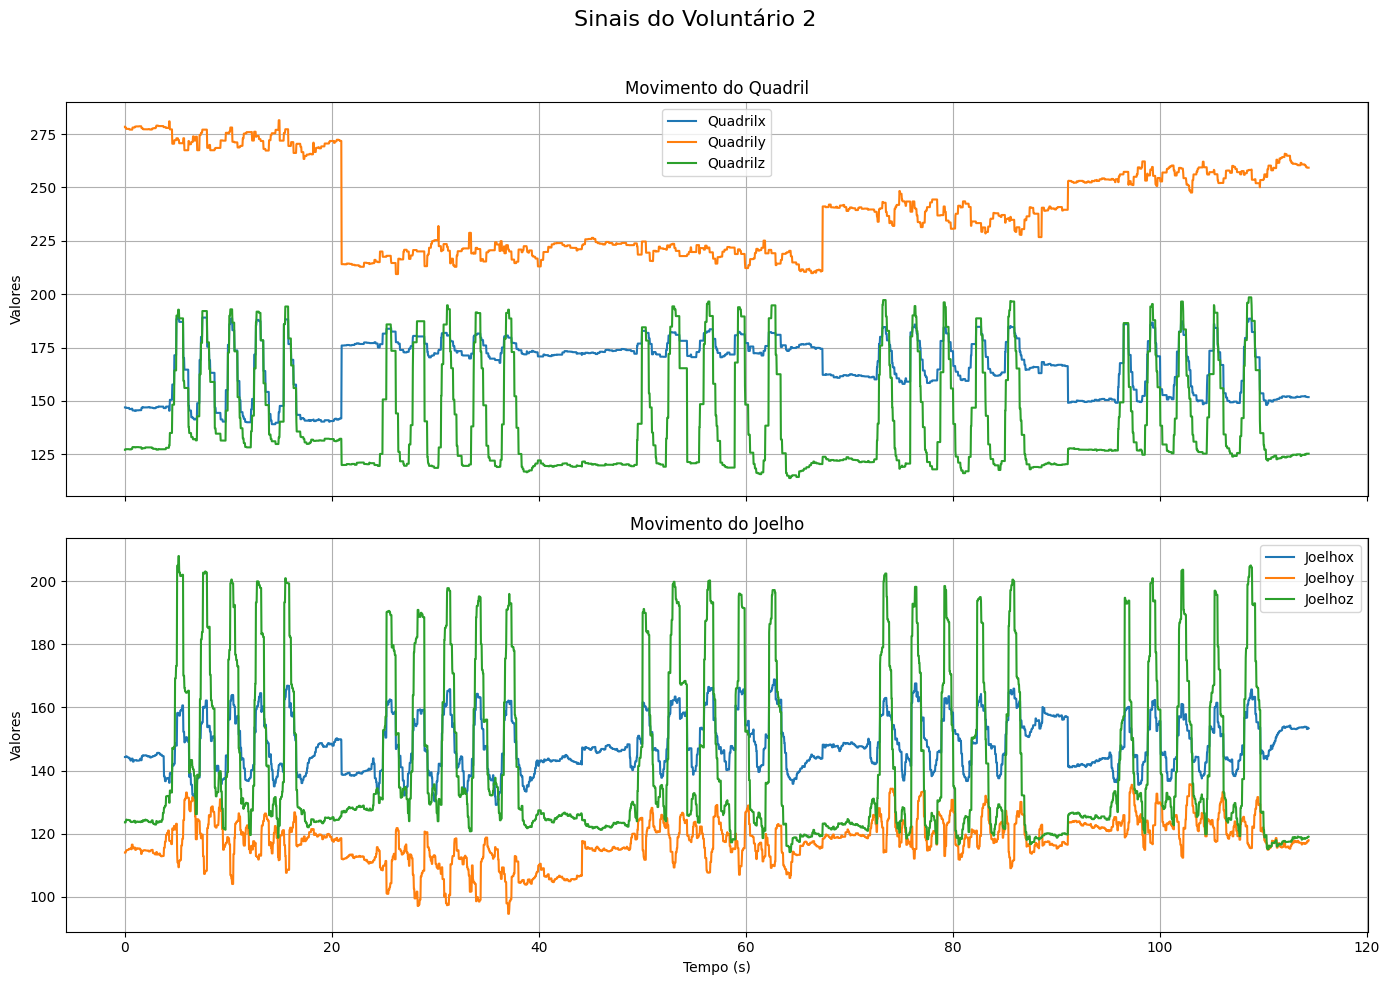


Preparando gráfico para o Voluntário nº 3...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


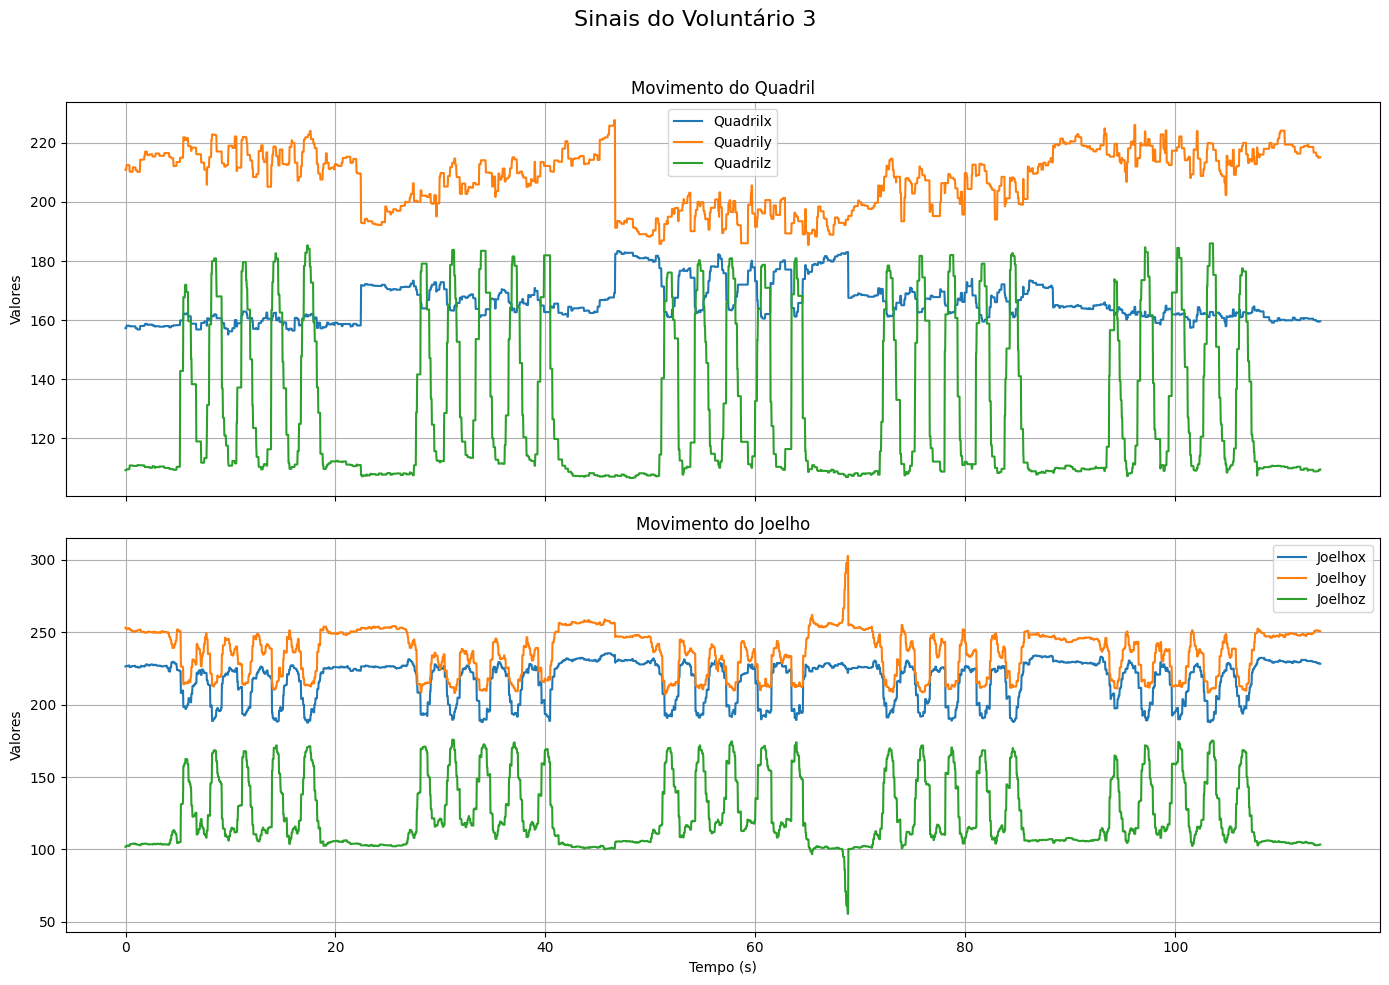


Preparando gráfico para o Voluntário nº 4...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


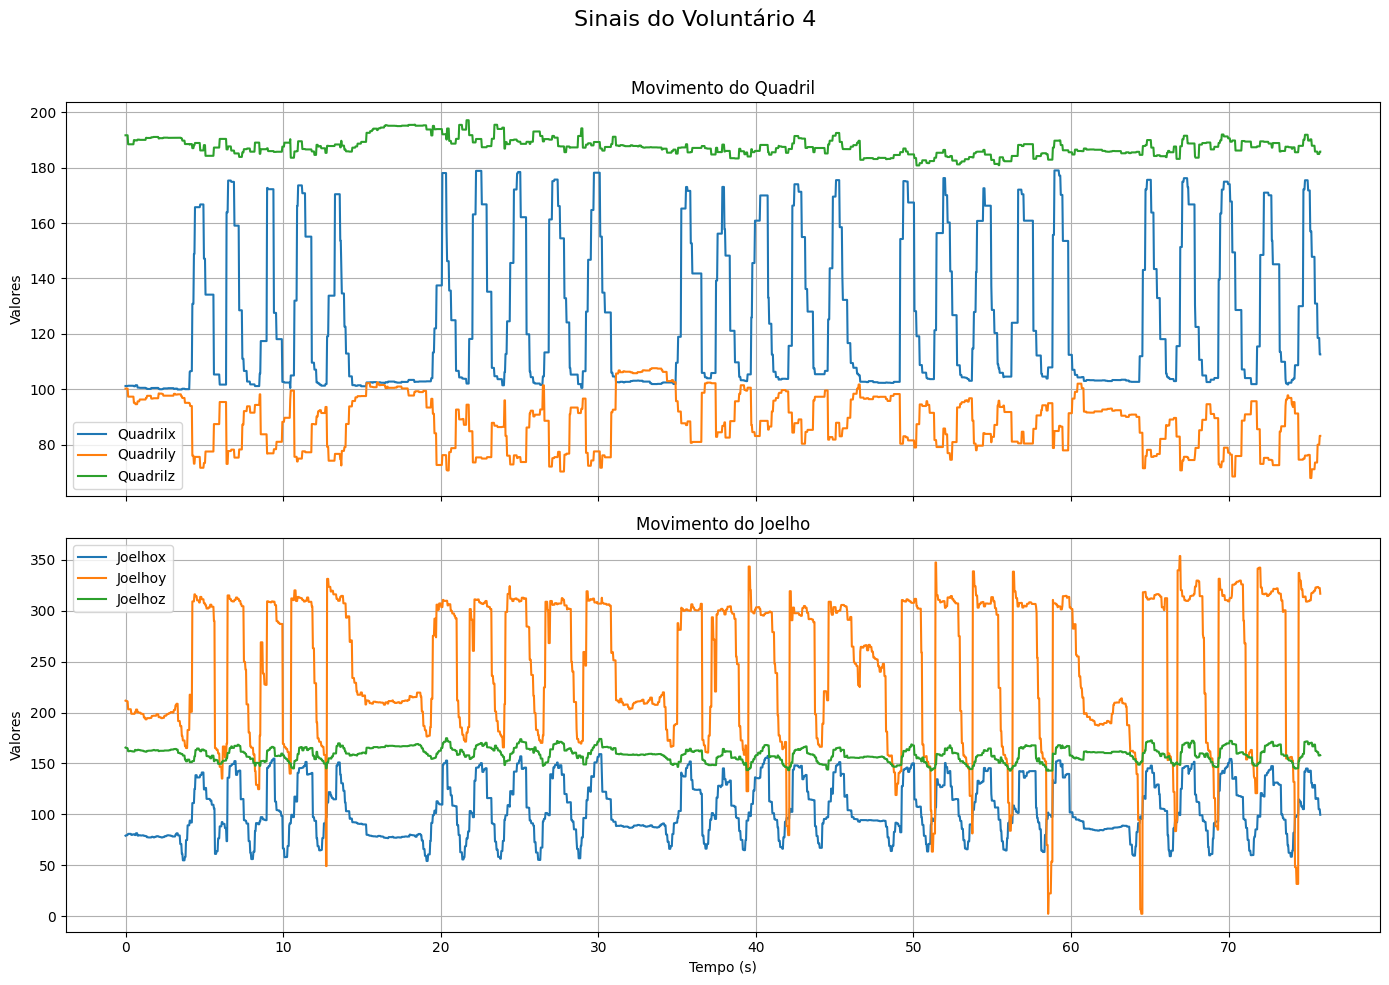


Preparando gráfico para o Voluntário nº 5...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


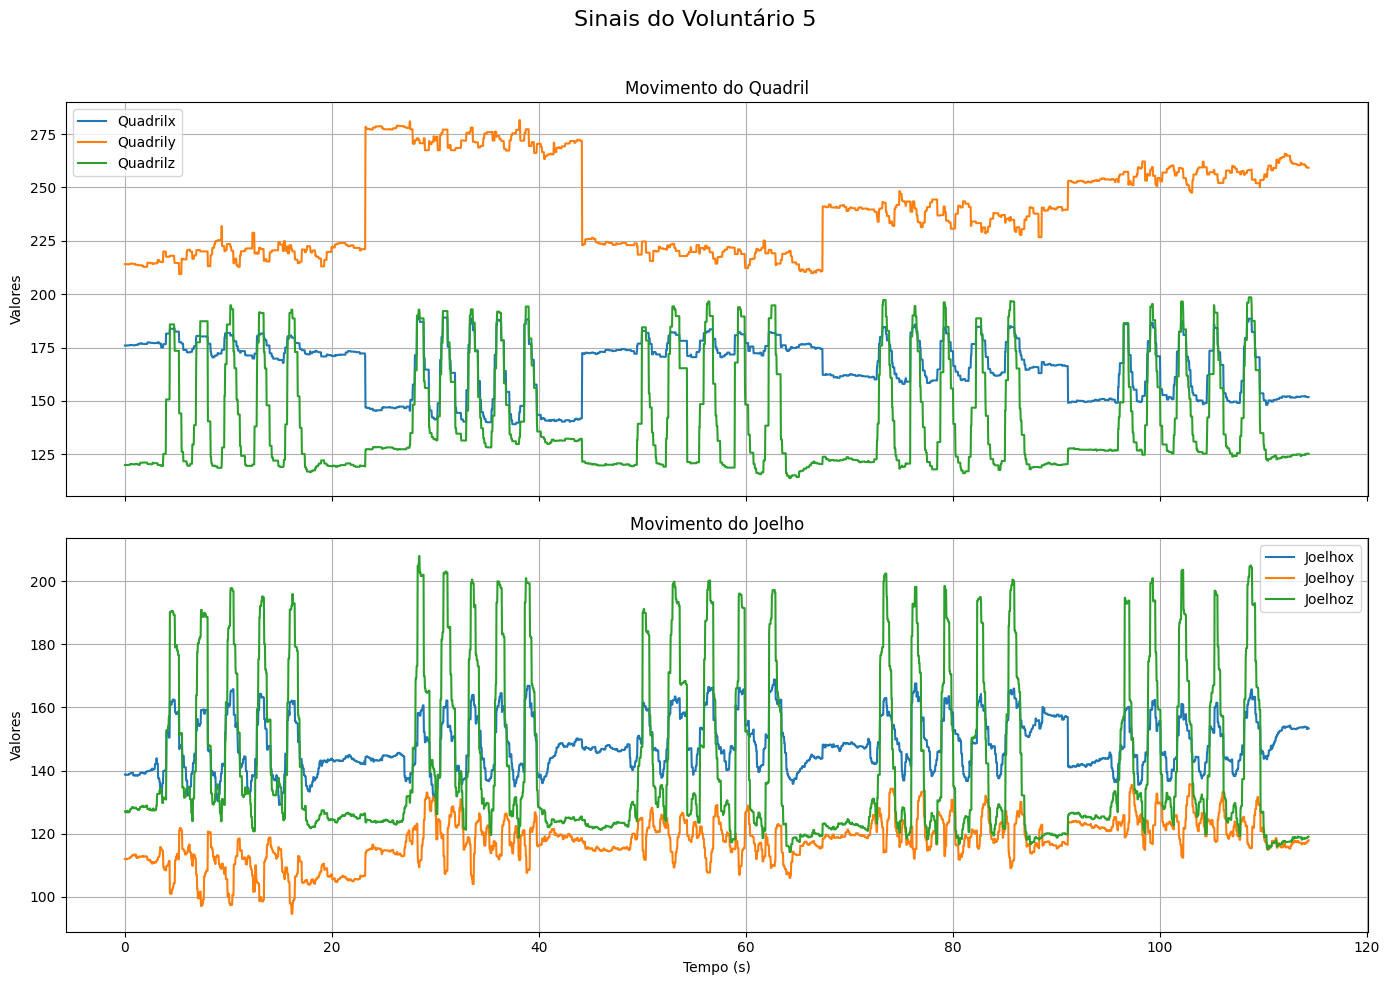


Preparando gráfico para o Voluntário nº 6...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


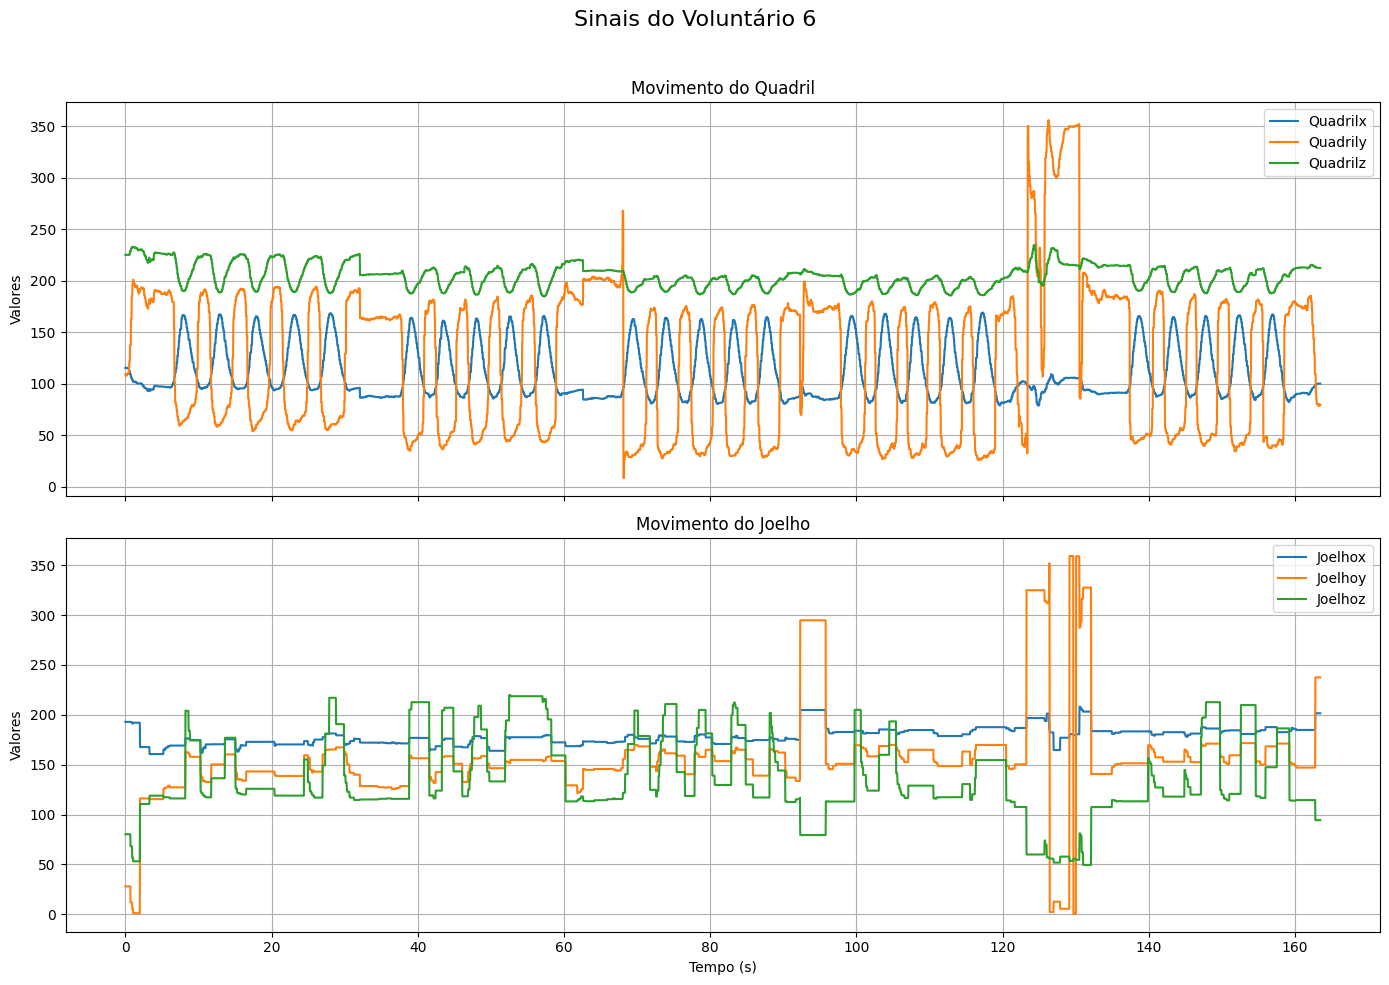


Preparando gráfico para o Voluntário nº 7...
Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...


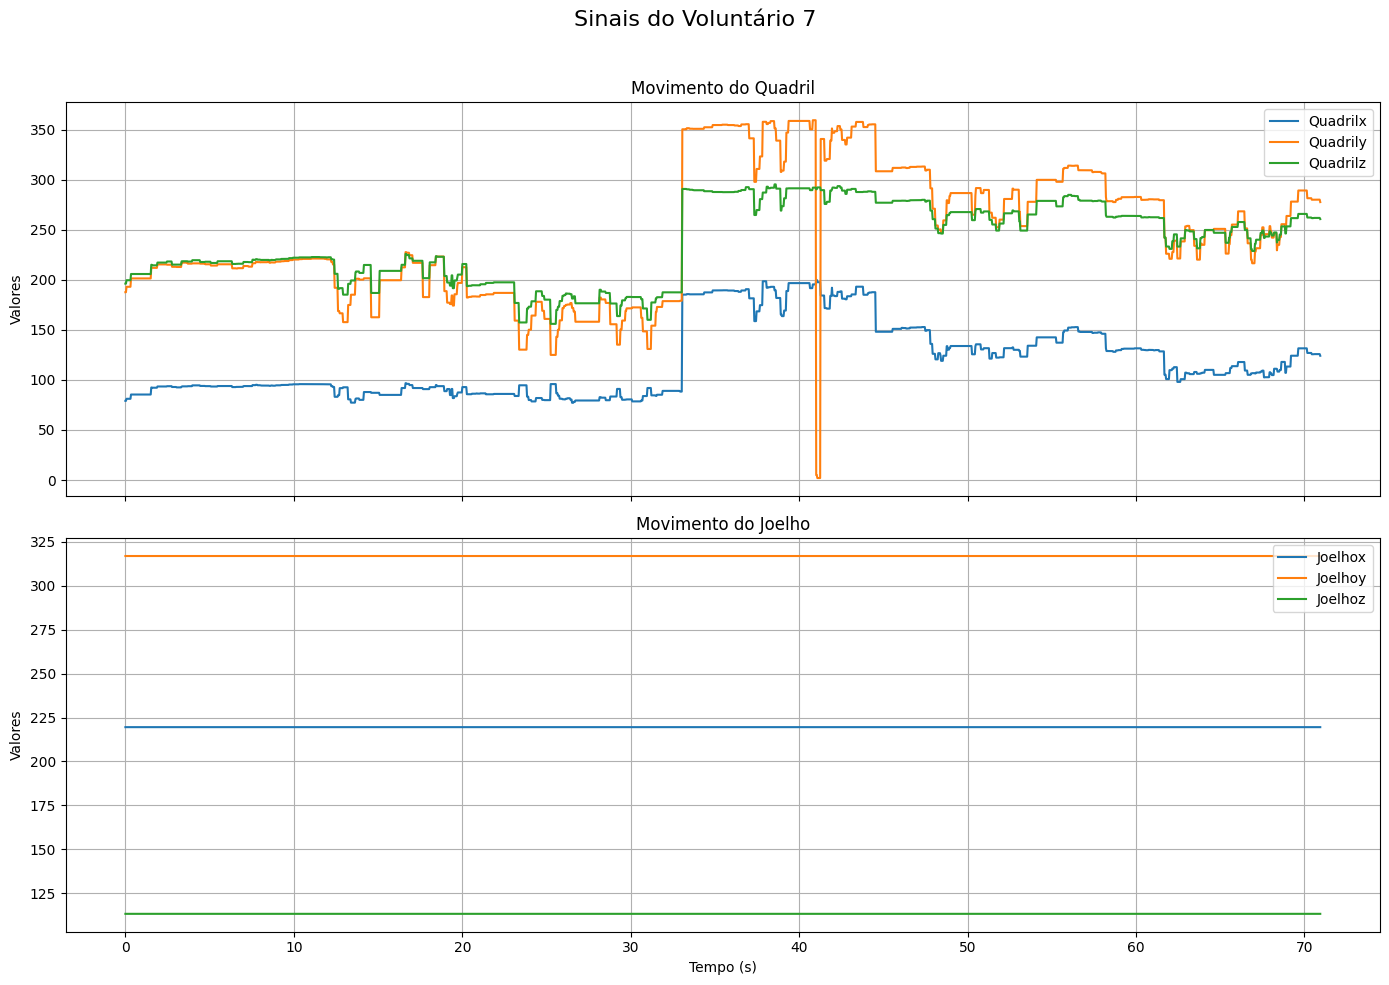


Fim do processo. Todos os gráficos foram exibidos.


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Configuração ---
# Pasta onde os arquivos CSV concatenados por voluntário estão
input_folder = '../../../data/rafaelDBConcatFolder'

# --- Lógica Principal ---

print(f"Procurando arquivos em: '{input_folder}'")

# 1. Encontra todos os arquivos CSV de voluntários na pasta de entrada
try:
    # Garante que os arquivos sejam processados em ordem numérica
    csv_files = sorted([f for f in os.listdir(input_folder) if f.startswith('rafaelDBConcatVol') and f.endswith('.csv')])
except FileNotFoundError:
    print(f"--- ERRO ---")
    print(f"A pasta de entrada '{input_folder}' não foi encontrada.")
    print("Por favor, execute o script de concatenação primeiro para criar esta pasta e os arquivos.")
    csv_files = []

if not csv_files:
    print("Nenhum arquivo CSV de voluntário encontrado para plotar.")
else:
    print(f"Encontrados {len(csv_files)} arquivos. Mostrando gráficos um por um.")

    # 2. Percorre cada arquivo CSV para gerar e mostrar um gráfico
    for filename in csv_files:
        # Extrai o número do voluntário do nome do arquivo
        match = re.search(r'Vol(\d+)\.csv', filename)
        if not match:
            continue
        
        volunteer_num = match.group(1)
        print(f"\nPreparando gráfico para o Voluntário nº {volunteer_num}...")
        
        file_path = os.path.join(input_folder, filename)
        
        try:
            df = pd.read_csv(file_path)
            
            # 3. Cria uma figura com 2 subplots (um em cima do outro)
            # sharex=True faz com que ambos os gráficos usem o mesmo eixo de tempo
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
            
            # Adiciona um título geral à janela do gráfico
            fig.suptitle(f'Sinais do Voluntário {volunteer_num}', fontsize=16)

            # --- Gráfico Superior: Quadril ---
            ax1.plot(df['timestamp'], df['Quadrilx'], label='Quadrilx')
            ax1.plot(df['timestamp'], df['Quadrily'], label='Quadrily')
            ax1.plot(df['timestamp'], df['Quadrilz'], label='Quadrilz')
            ax1.set_title('Movimento do Quadril')
            ax1.set_ylabel('Valores')
            ax1.legend()
            ax1.grid(True)
            
            # --- Gráfico Inferior: Joelho ---
            ax2.plot(df['timestamp'], df['Joelhox'], label='Joelhox')
            ax2.plot(df['timestamp'], df['Joelhoy'], label='Joelhoy')
            ax2.plot(df['timestamp'], df['Joelhoz'], label='Joelhoz')
            ax2.set_title('Movimento do Joelho')
            ax2.set_xlabel('Tempo (s)')
            ax2.set_ylabel('Valores')
            ax2.legend()
            ax2.grid(True)
            
            # Ajusta o layout para evitar sobreposição
            plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta para o supertítulo
            
            # 4. Mostra o gráfico na tela. O script ficará pausado aqui
            # até você fechar a janela do gráfico.
            print("Mostrando gráfico. Feche a janela para continuar para o próximo voluntário...")
            plt.show()

        except Exception as e:
            print(f"❌ Erro ao processar o arquivo '{filename}': {e}")

print("\nFim do processo. Todos os gráficos foram exibidos.")